In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# get the dataset, we have 2, one with data on the people, and one with whether they paid their credit or not
app_rec=pd.read_csv("application_record.csv")
cred_rec=pd.read_csv("credit_record.csv")

In [5]:
app_rec.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

We only have Null values in the Occupation_Type others don't have any. There is 134203 null values\
So we are going to replace the Nan values by "unknown", because deleting the lines who have a null value in occupation would make us lose too much lines/data

In [10]:
app_rec=app_rec.fillna("unknown")

Description of the different variables\
CODE_GENDER          What is the gender of the person\
FLAG_OWN_CAR         Does he have a car or not\
FLAG_OWN_REALTY      Does he have a property\
CNT_CHILDREN         Number of children\
AMT_INCOME_TOTAL     Annual income\
NAME_INCOME_TYPE     income category\ 
NAME_EDUCATION_TYPE  Education level\
NAME_FAMILY_STATUS   Marital status\
NAME_HOUSING_TYPE    Way of living\
DAYS_BIRTH           Birthday \
DAYS_EMPLOYED        Start date of employment (Count backwards from current day(0). If positive, it means the person currently unemployed.)  \
FLAG_MOBIL           Is there a mobile phone  \
FLAG_WORK_PHONE      Is there a work phone\
FLAG_PHONE           Is there a phone\
FLAG_EMAIL           Is there an email\
OCCUPATION_TYPE      Occupation work\
CNT_FAM_MEMBERS      Family size

In [12]:
cred_rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


ID	Client number \
MONTHS_BALANCE	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on \
STATUS	Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [14]:
cred_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


No null values in the cred_rec dataset

In [16]:
cred_rec['ID'].nunique()

45985

So we have about 46000 unique people in the cred rec data set

In [18]:
unique_counts = pd.DataFrame.from_records([(col, app_rec[col].nunique()) for col in app_rec.columns],
                          columns=['Column_Name', 'Num_Unique'])
unique_counts

,Column_Name,Num_Unique
0,ID,438510
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
4,CNT_CHILDREN,12
5,AMT_INCOME_TOTAL,866
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5
8,NAME_FAMILY_STATUS,5
9,NAME_HOUSING_TYPE,6


We see that flag_mobil only has 1 values, it is only filled with 1 so this column gives us 0 information so we can just drop it

In [21]:
app_rec = app_rec.drop(columns=['FLAG_MOBIL'])

Now let's look at the different variables of each features (the ones that aren't binary)

We are now going to merge the 2 data sets that we have on the ID, And we are going to consider that anyone who hasn't paid there credits in over 60 days will be consider a bad status, and so will get a 1 others will be assigned with a 0

In [28]:
cred_rec["STATUS_BINARY"] = None

cred_rec.loc[cred_rec["STATUS"] == "2", "STATUS_BINARY"] = "Y"
cred_rec.loc[cred_rec["STATUS"] == "3", "STATUS_BINARY"] = "Y"
cred_rec.loc[cred_rec["STATUS"] == "4", "STATUS_BINARY"] = "Y"
cred_rec.loc[cred_rec["STATUS"] == "5", "STATUS_BINARY"] = "Y"

record_count=cred_rec.groupby('ID').count()
record_count['STATUS_BINARY'][record_count['STATUS_BINARY'] > 0]='Y' 
record_count['STATUS_BINARY'][record_count['STATUS_BINARY'] == 0]='N' 
record_count.drop(columns=["STATUS"])
record_count=record_count.drop(columns=["MONTHS_BALANCE"])
record_count["STATUS_BINARY"]=record_count["STATUS_BINARY"].map({"N":0,"Y":1})
df_merged=pd.merge(app_rec,record_count,how='inner',on='ID')
df_merged=df_merged.drop(columns=["STATUS"])

Let's look at the different categories for several categorical columns and the children and family members count

In [126]:
print("CNT_CHILDREN")
print(app_rec['CNT_CHILDREN'].unique())
print("\n")

print("NAME_INCOME_TYPE")
print(app_rec['NAME_INCOME_TYPE'].unique())
print("\n")

print("NAME_EDUCATION_TYPE")
print(app_rec['NAME_EDUCATION_TYPE'].unique())
print("\n")

print("NAME_FAMILY_STATUS")
print(app_rec['NAME_FAMILY_STATUS'].unique())
print("\n")

print("NAME_HOUSING_TYPE")
print(app_rec['NAME_HOUSING_TYPE'].unique())
print("\n")

print("OCCUPATION_TYPE")
print(app_rec['OCCUPATION_TYPE'].unique())
print("\n")

print("CNT_FAM_MEMBERS")
print(app_rec['CNT_FAM_MEMBERS'].unique())
print("\n")


CNT_CHILDREN
[ 0  1  3  2  4  5 14 19  7  9 12  6]


NAME_INCOME_TYPE
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']


NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


NAME_FAMILY_STATUS
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']


NAME_HOUSING_TYPE
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


OCCUPATION_TYPE
['unknown' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']


CNT_FAM_MEMBERS
[ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]




Let's make the DATES variables more understandable

In [31]:
df=df_merged.copy()
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365

df['IS_UNEMPLOYED'] = (df['DAYS_EMPLOYED'] > 0).astype(int)

df['YEARS_EMPLOYED'] = np.nan
df.loc[df['DAYS_EMPLOYED'] < 0, 'YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED'] / 365
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].fillna(0)

df=df.drop(columns=["DAYS_BIRTH"])
df=df.drop(columns=["DAYS_EMPLOYED"])

We are changing the column of days_birth to the age of the person, as well as a column to see whether the person is employed instead of the numbers of days they were employed. We are also adding a column of the amount of years a person has been employed instead of the number of days.

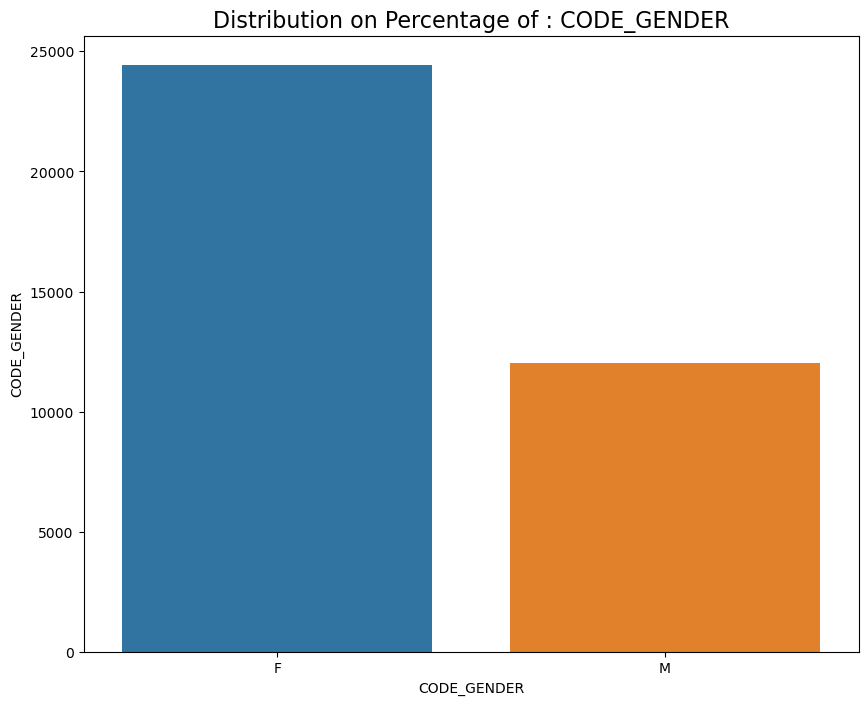

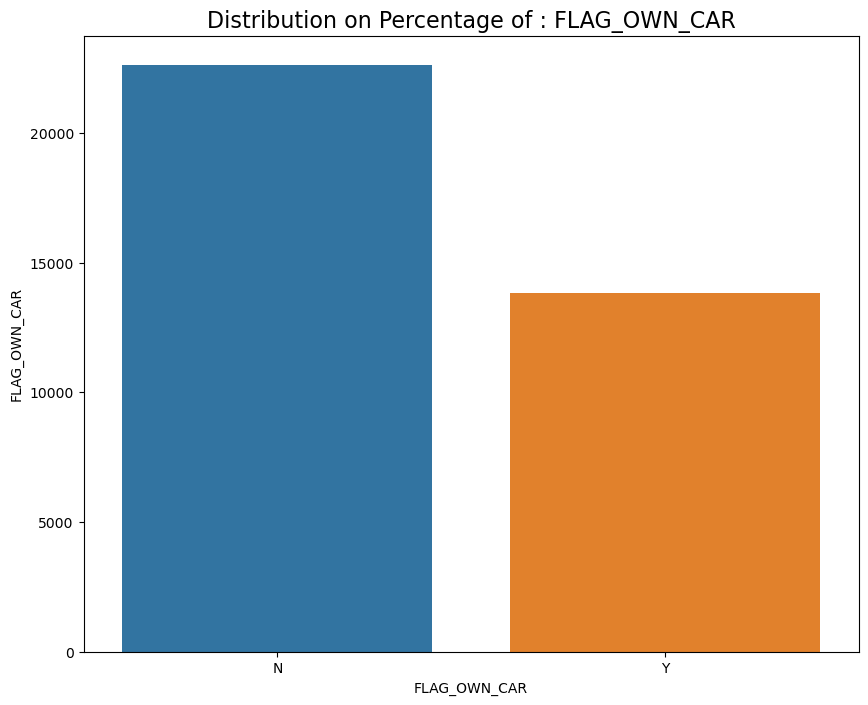

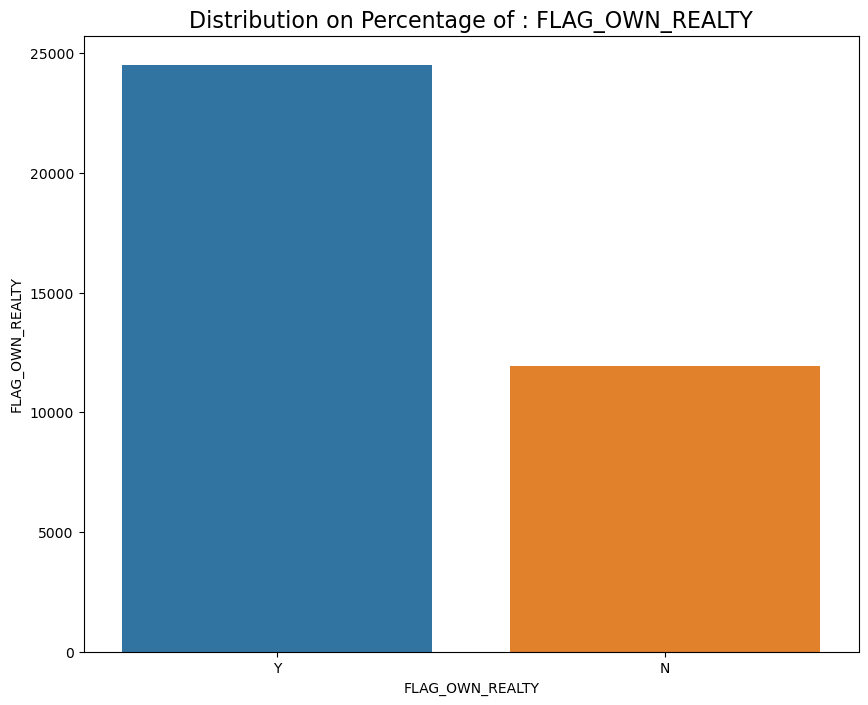

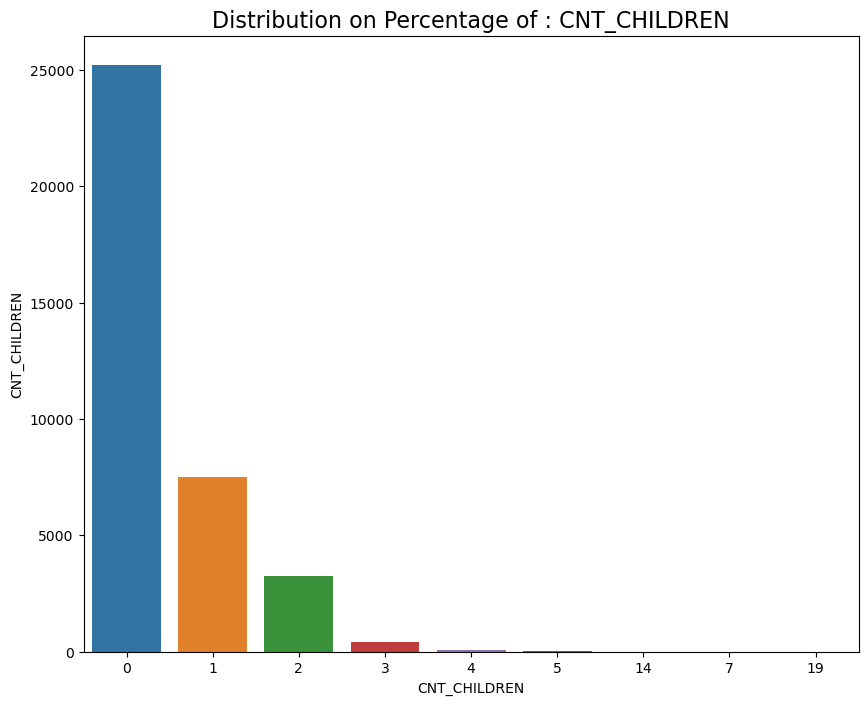

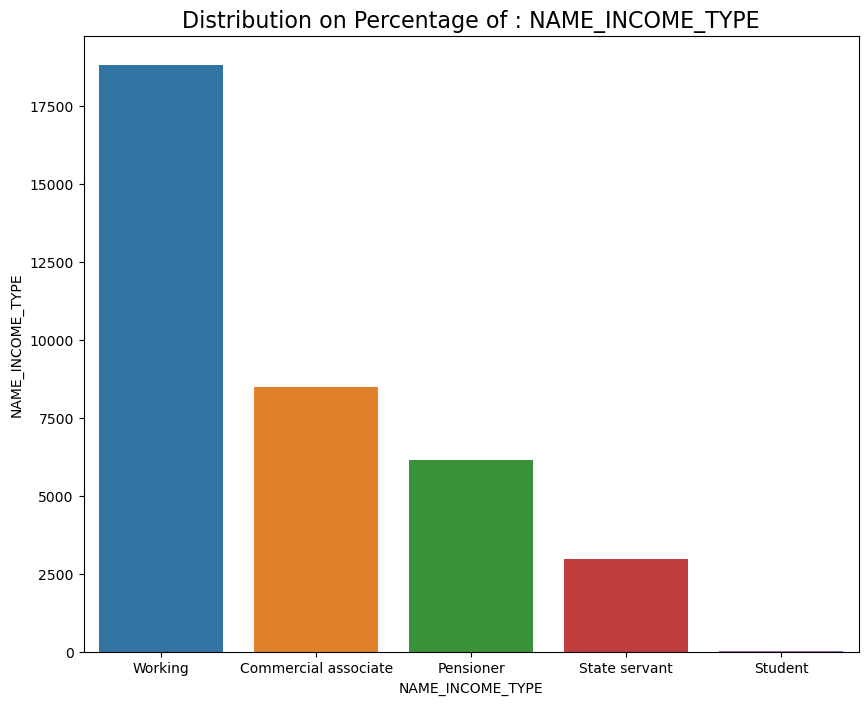

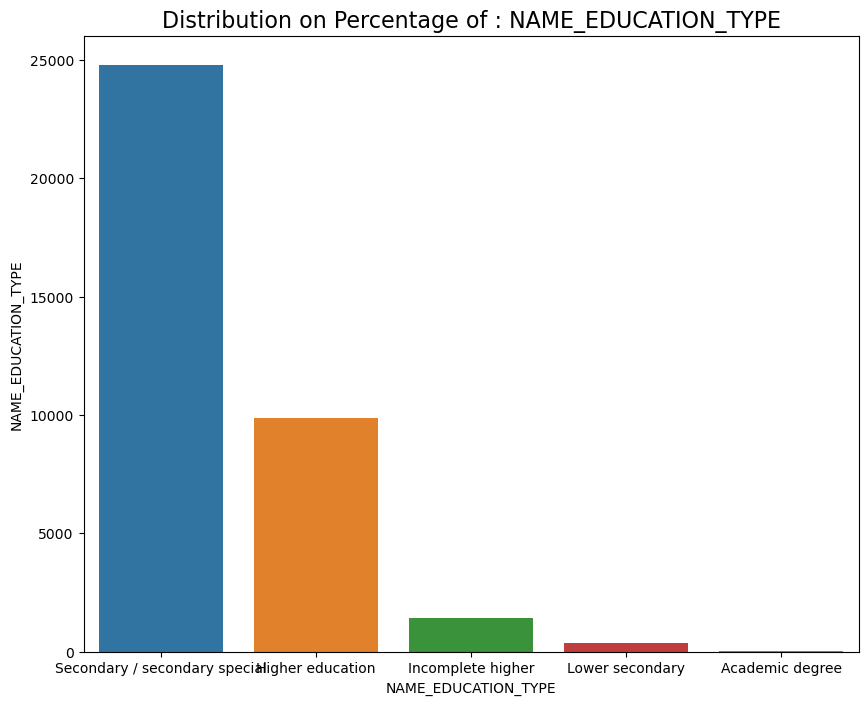

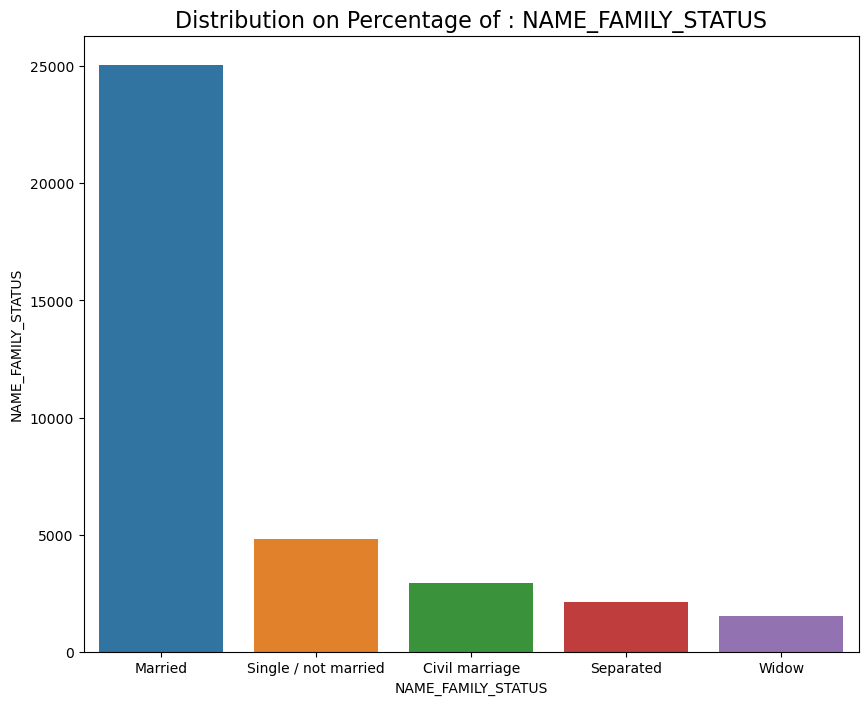

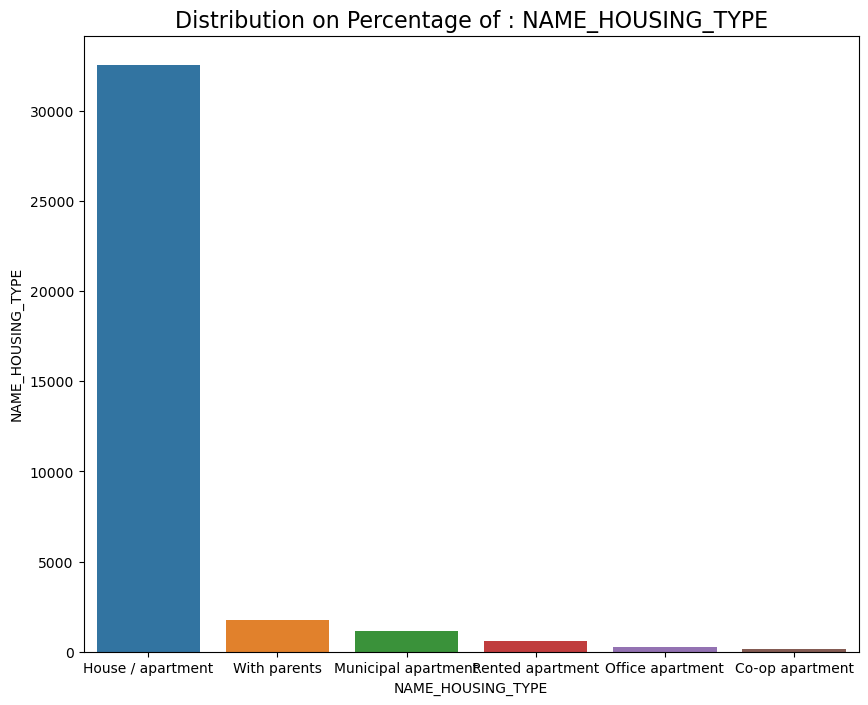

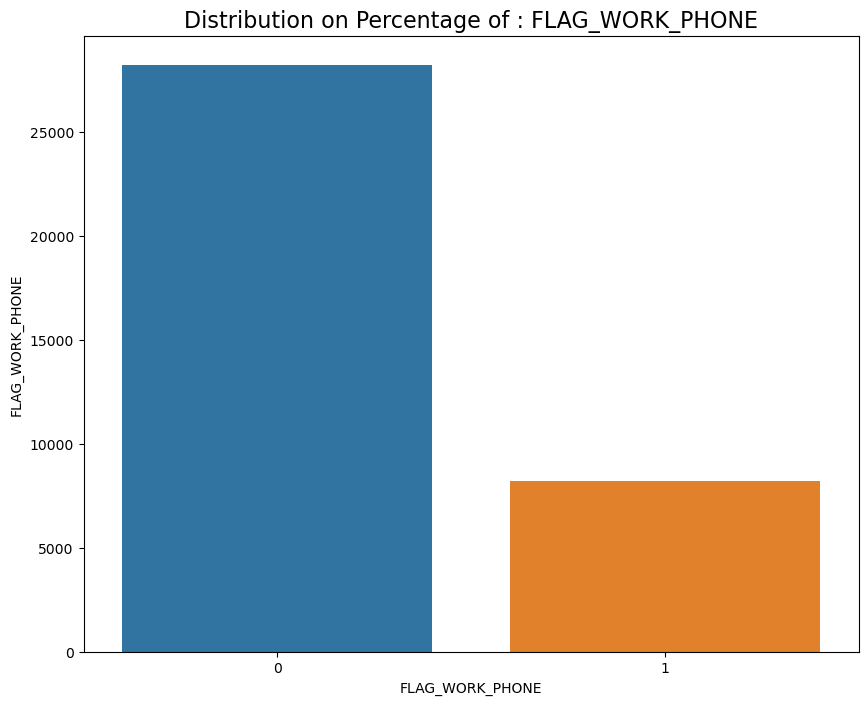

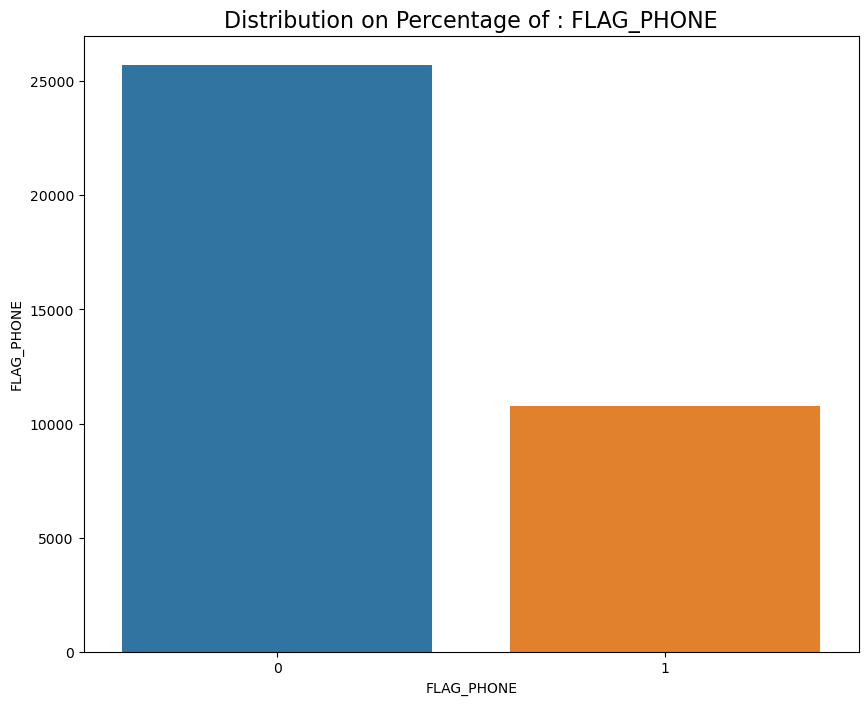

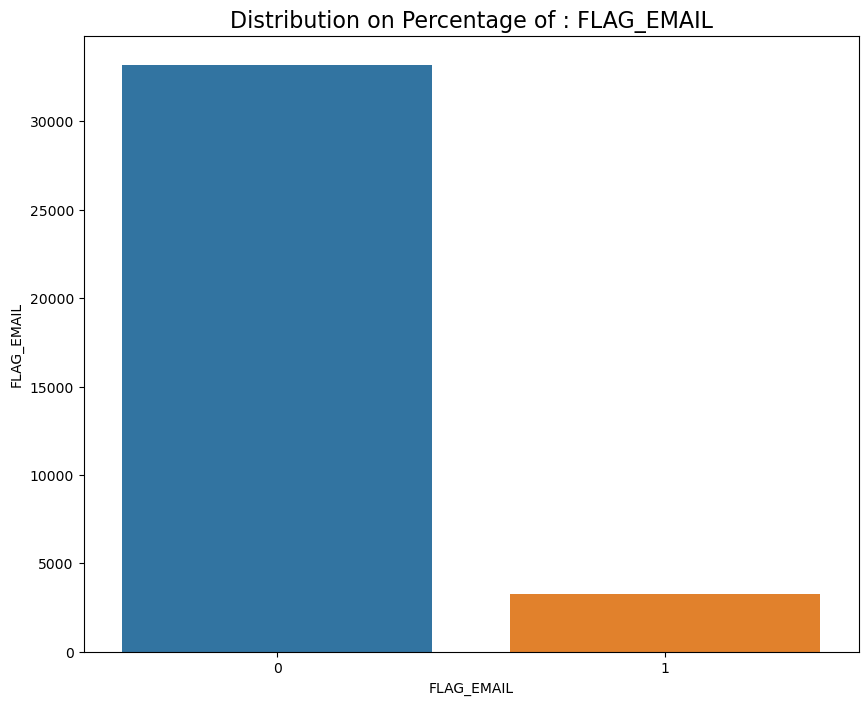

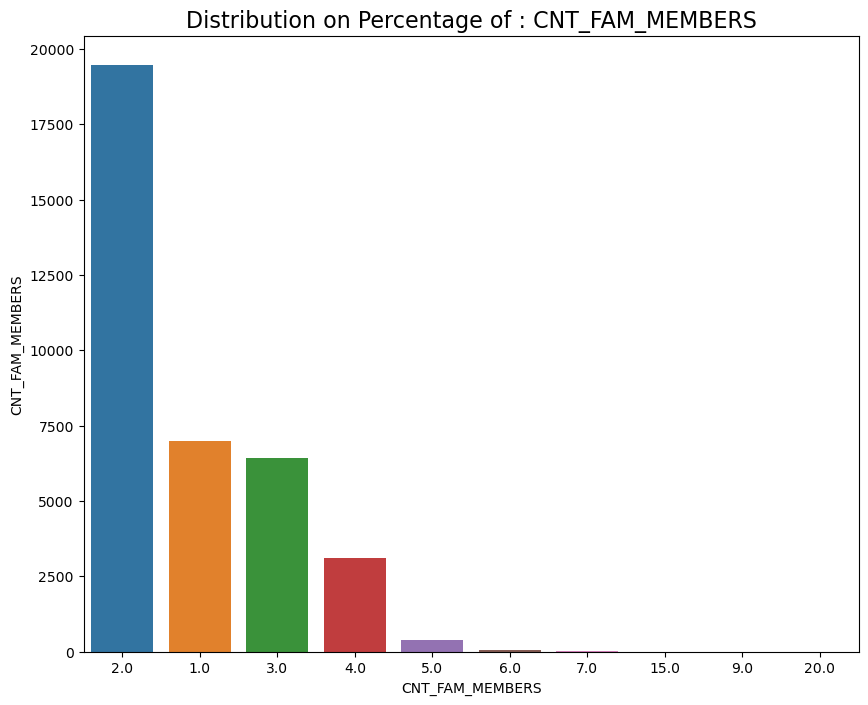

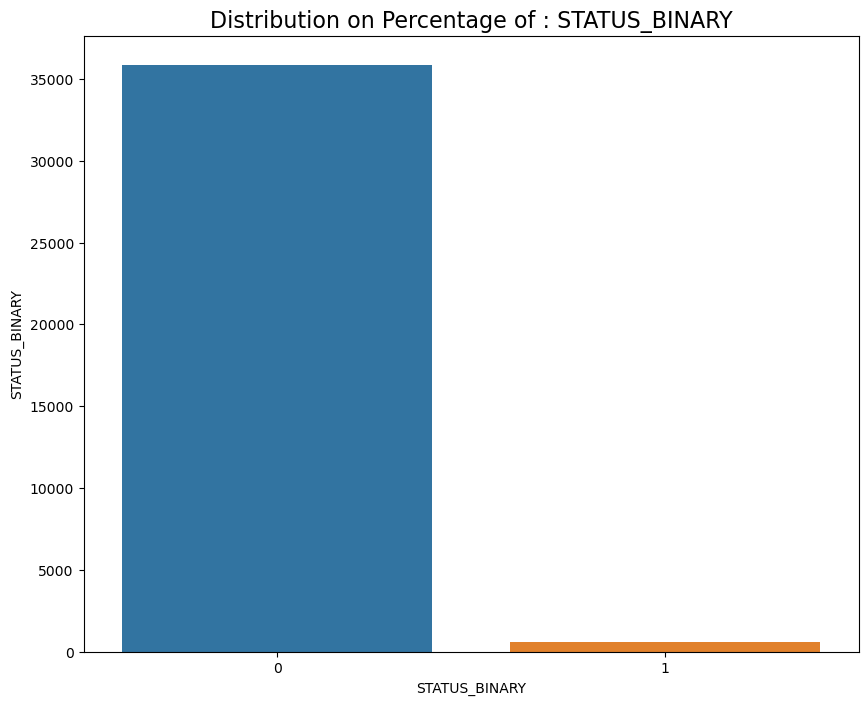

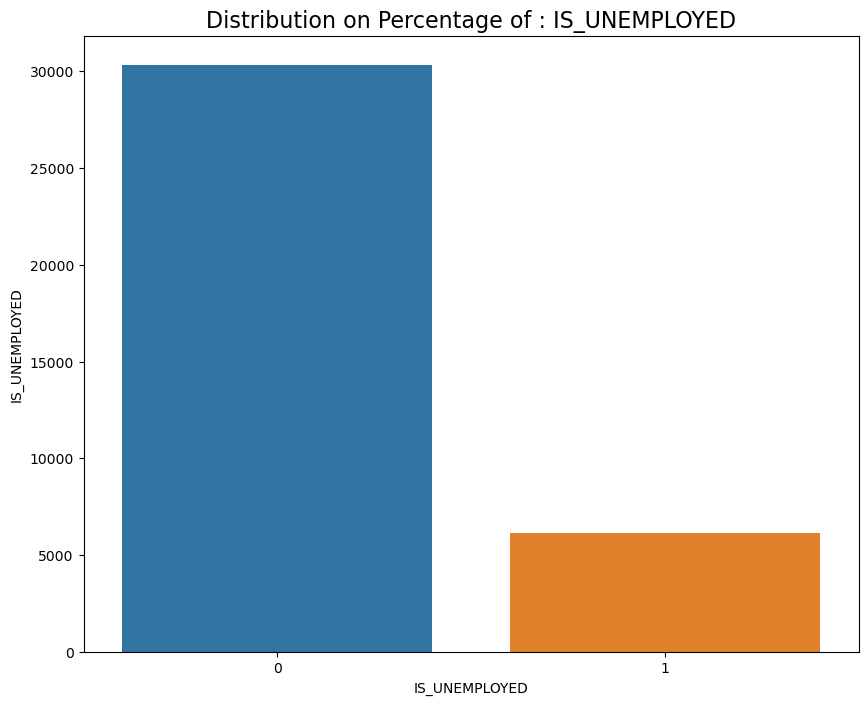

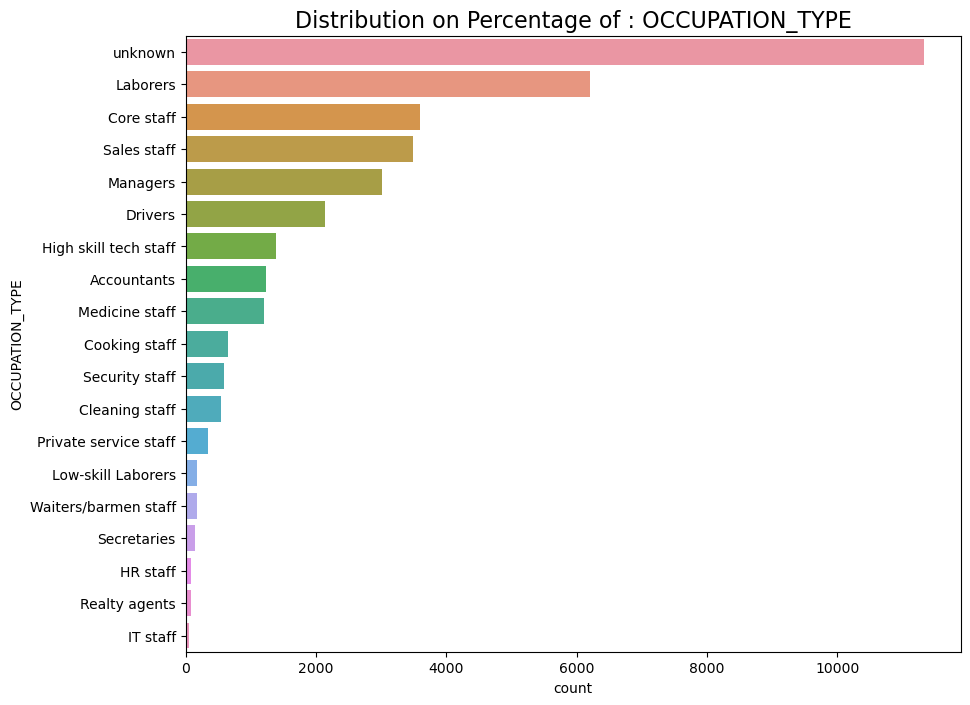

In [34]:
cols_to_exclude = ['ID', 'AGE_YEARS', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL', 'BINARY_STATUS','OCCUPATION_TYPE']
cols_to_plot = [col for col in df.columns if col not in cols_to_exclude]
for col in cols_to_plot:
    plt.figure(figsize=(10, 8))
    
    n_unique = df[col].nunique()
   
    ax = sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.ylabel(col)

    plt.title(f'Distribution on Percentage of : {col}', fontsize=16)
    plt.show()

#doing OCCUPATION TYPE on the y column because too many values so need to make it readable
plt.figure(figsize=(10, 8))

p = sns.countplot(y='OCCUPATION_TYPE', data=df, order=df['OCCUPATION_TYPE'].value_counts().index)

total = len(df['OCCUPATION_TYPE'])
plt.ylabel('OCCUPATION_TYPE')
plt.title(f'Distribution on Percentage of : {"OCCUPATION_TYPE"}', fontsize=16)
plt.show()


Taux de défaut global (moyenne) : 1.69%


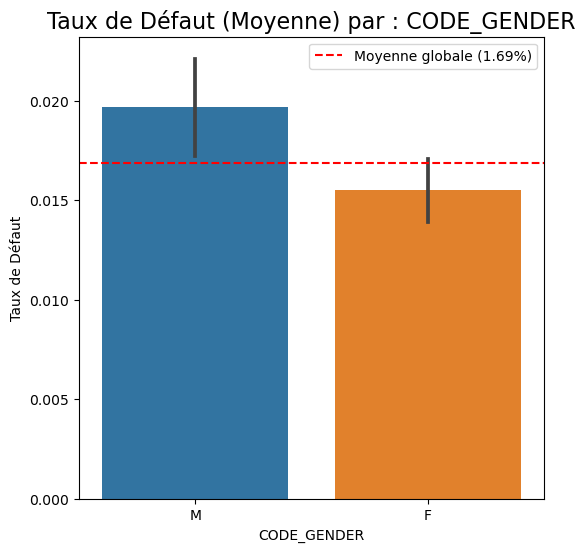

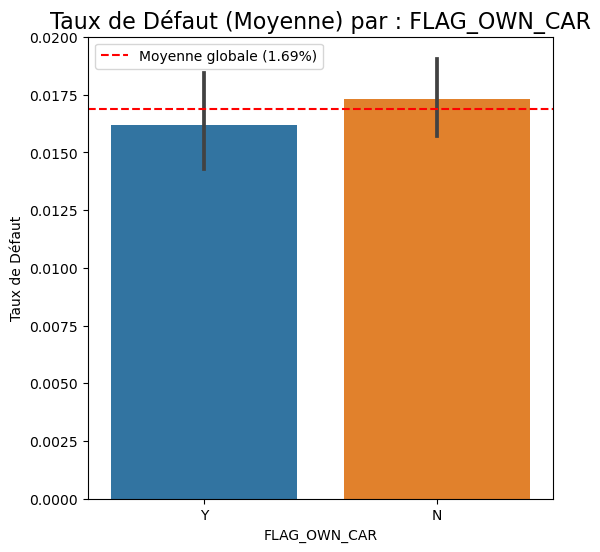

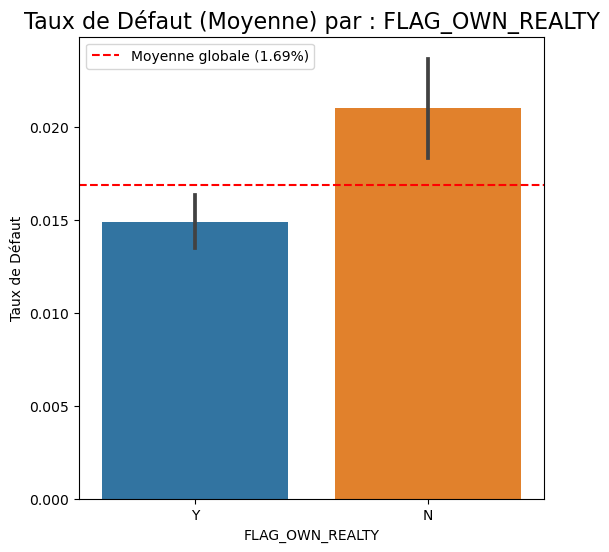

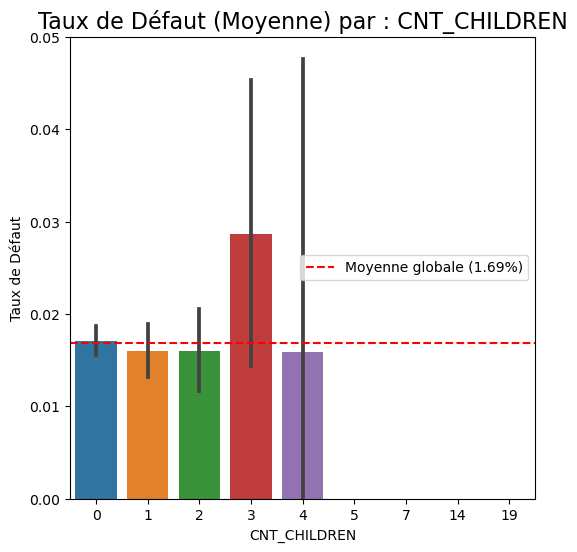

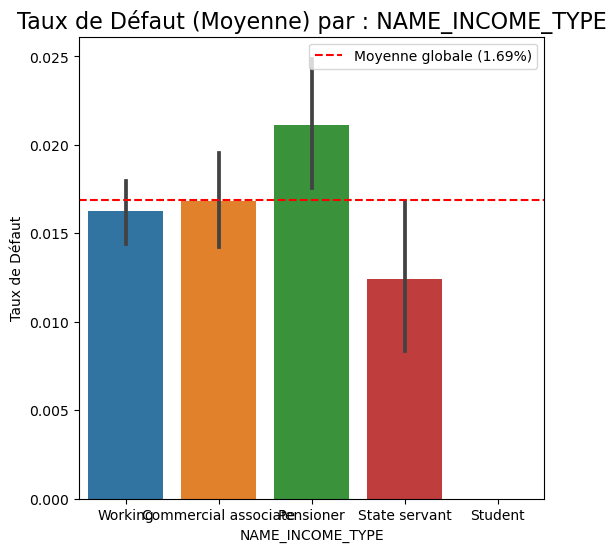

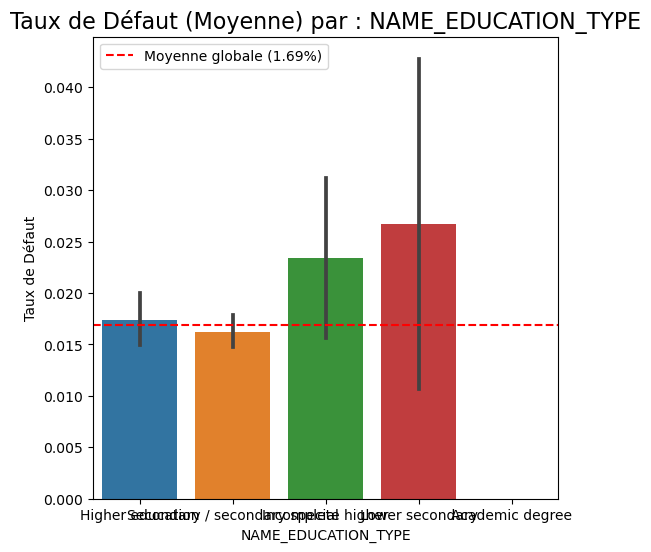

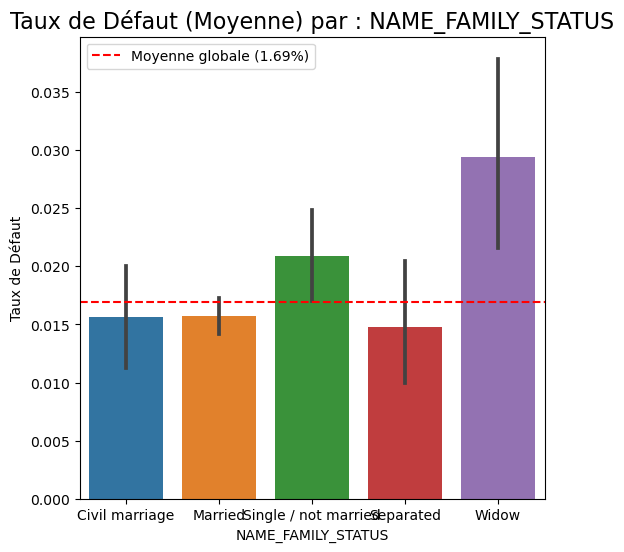

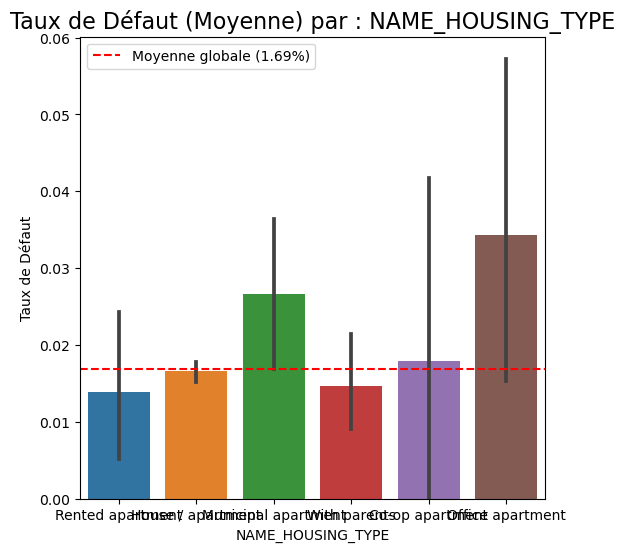

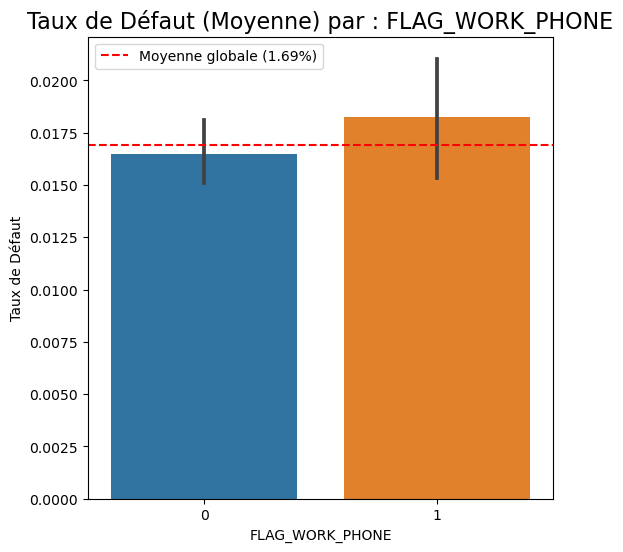

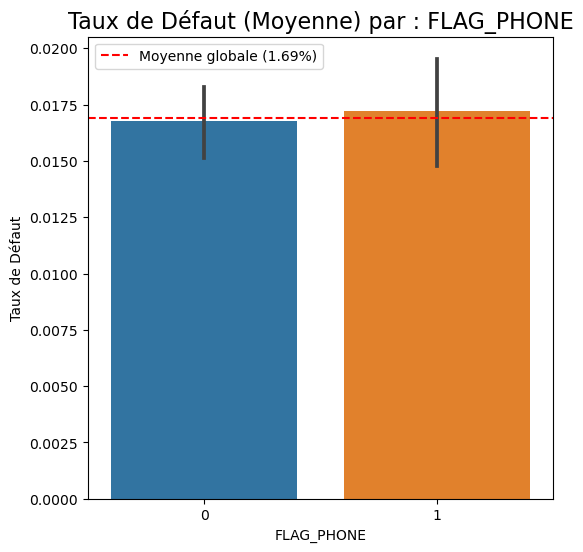

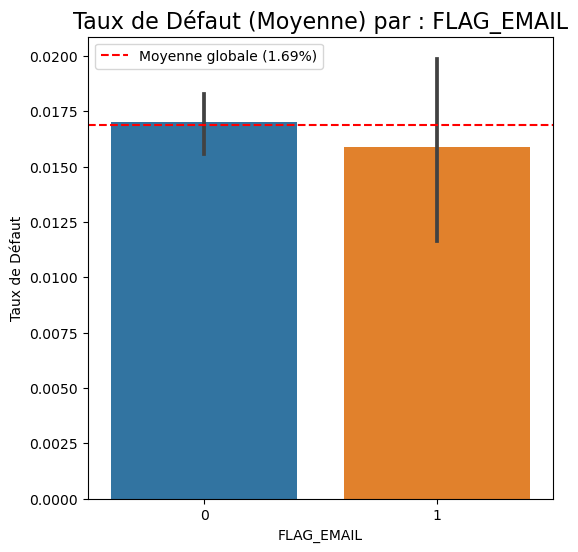

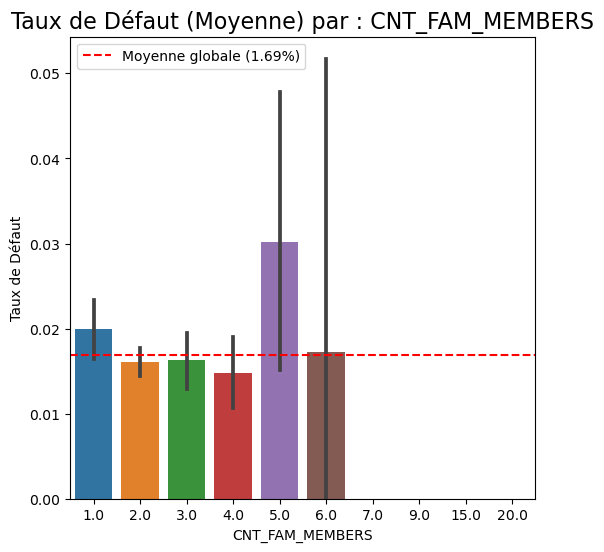

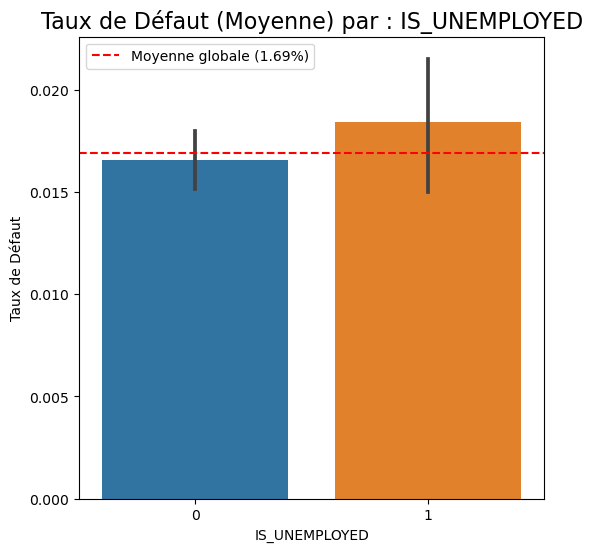

Affichage du graphique pour OCCUPATION_TYPE (horizontal)...


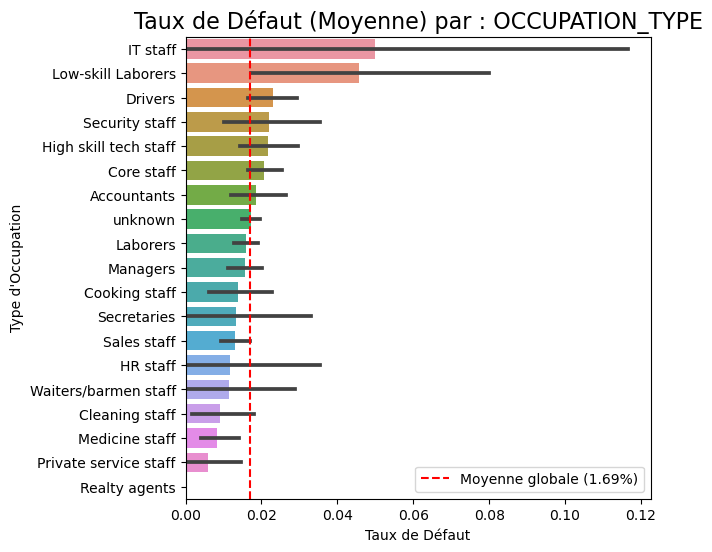

In [176]:
global_default_rate = df['STATUS_BINARY'].mean()
print(f"Taux de défaut global (moyenne) : {global_default_rate*100:.2f}%")

cols_to_plot = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 
    'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'IS_UNEMPLOYED'
]


for col in cols_to_plot:
    plt.figure(figsize=(6, 6))
    
    # sns.barplot calcule la MOYENNE de 'BINARY_STATUS' pour chaque 'col'
    ax = sns.barplot(x=col, y='STATUS_BINARY', data=df)
    
    # Ajouter la ligne de moyenne globale pour comparer
    ax.axhline(y=global_default_rate, color='red', linestyle='--', 
               label=f'Moyenne globale ({global_default_rate*100:.2f}%)')
    
    plt.title(f'Taux de Défaut (Moyenne) par : {col}', fontsize=16)
    plt.ylabel('Taux de Défaut') 
    plt.xlabel(col)

    plt.legend()
    plt.show()

print("Affichage du graphique pour OCCUPATION_TYPE (horizontal)...")

plt.figure(figsize=(6, 6))

ordered_categories = df.groupby('OCCUPATION_TYPE')['STATUS_BINARY'].mean().sort_values(ascending=False).index

ax = sns.barplot(y='OCCUPATION_TYPE', x='STATUS_BINARY', data=df, order=ordered_categories)

ax.axvline(x=global_default_rate, color='red', linestyle='--', 
           label=f'Moyenne globale ({global_default_rate*100:.2f}%)')

plt.title(f'Taux de Défaut (Moyenne) par : OCCUPATION_TYPE', fontsize=16)
plt.xlabel('Taux de Défaut')
plt.ylabel('Type d\'Occupation')
plt.legend()
plt.show()

Colonnes numériques à visualiser : ['AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED']


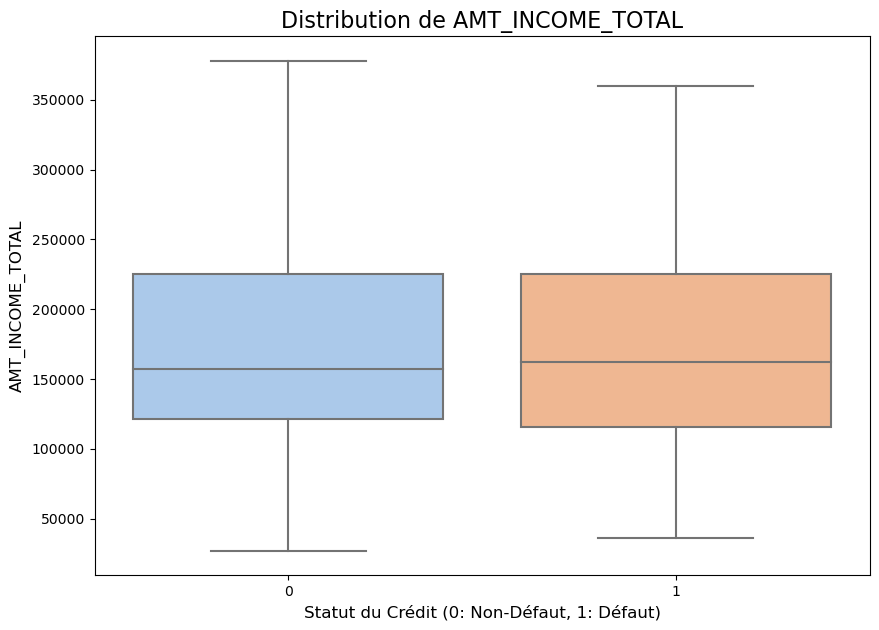

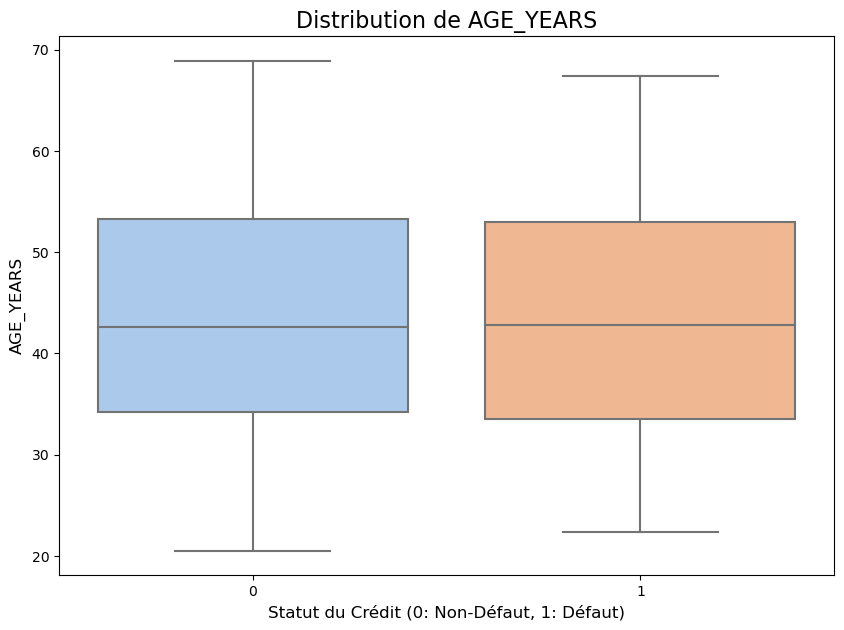

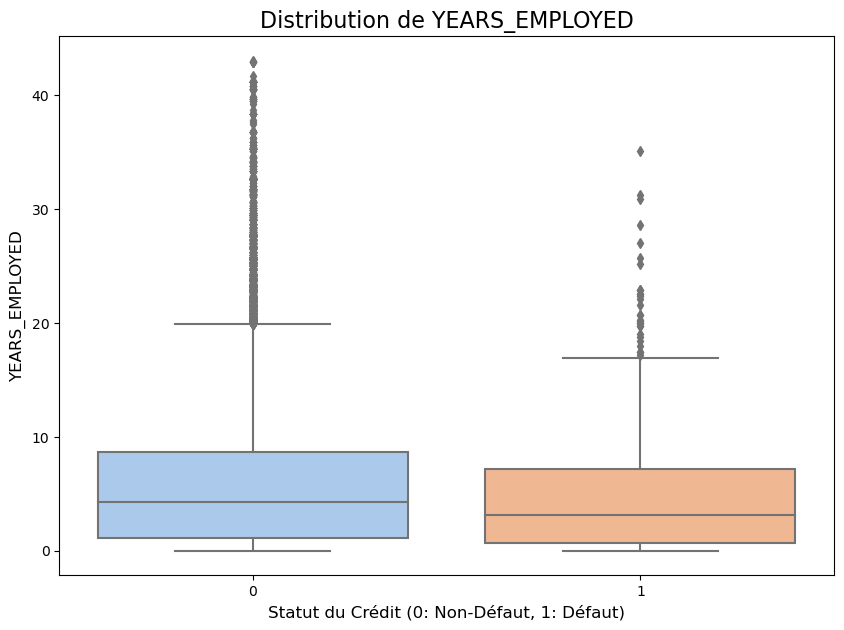

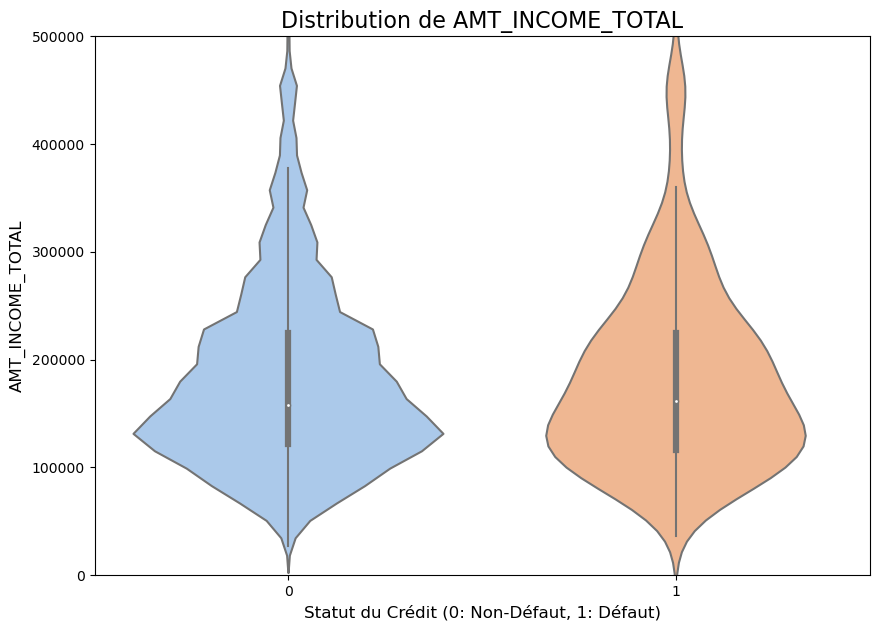

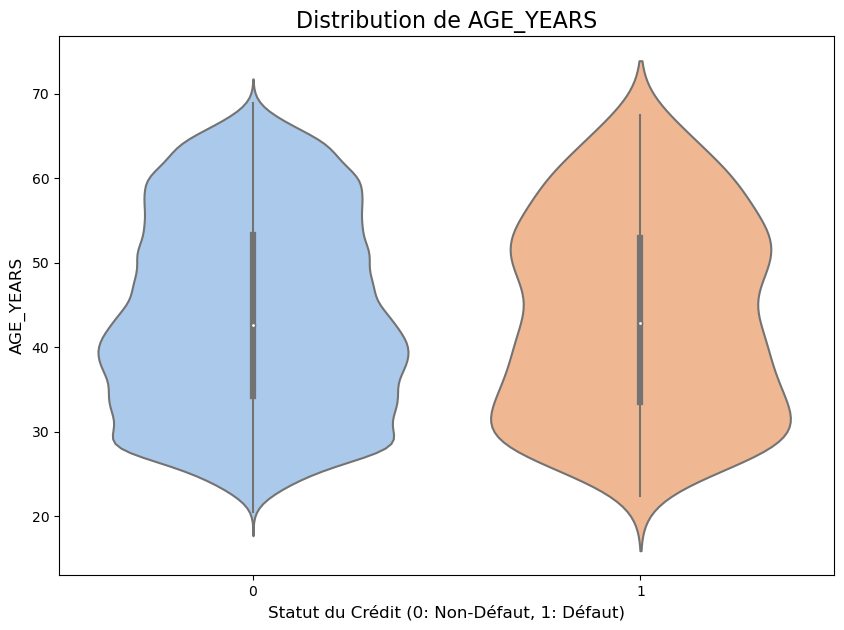

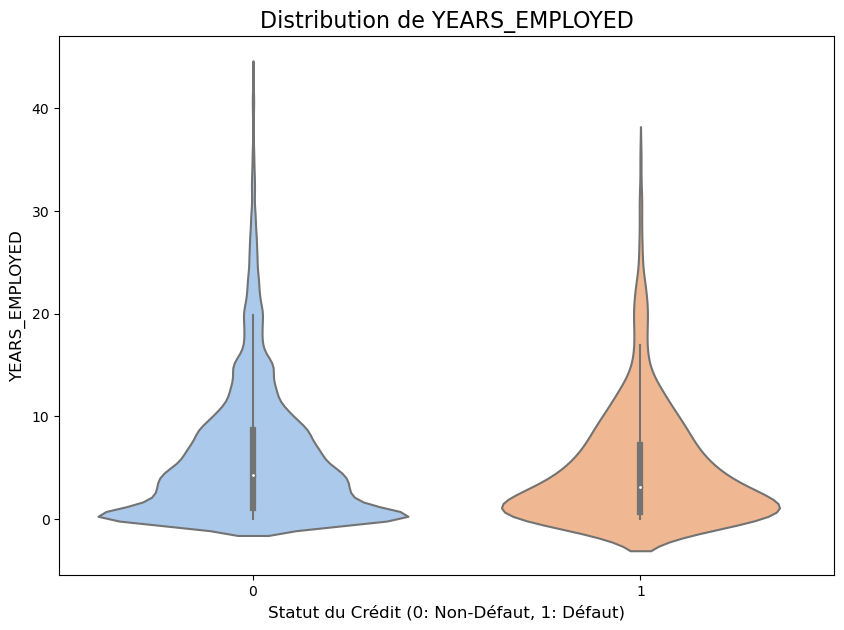

In [171]:
# now let's look at the column we left aside previously
numerical_cols = ['AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED']
print(f"Colonnes numériques à visualiser : {numerical_cols}")

# Boxplots

for col in numerical_cols:
    plt.figure(figsize=(10, 7))
    
    if col == 'AMT_INCOME_TOTAL':
        # we hide the outliers because there is too many (with showfliers)
        ax = sns.boxplot(x='STATUS_BINARY', y=col, data=df, palette="pastel", showfliers=False)
        ax.set_title(f'Distribution de {col}', fontsize=16)
    else:
        ax = sns.boxplot(x='STATUS_BINARY', y=col, data=df, palette="pastel", showfliers=True)
        ax.set_title(f'Distribution de {col}', fontsize=16)

    plt.xlabel('Statut du Crédit (0: Non-Défaut, 1: Défaut)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.show()


for col in numerical_cols:
    plt.figure(figsize=(10, 7))
    
    if col == 'AMT_INCOME_TOTAL':
        ax = sns.violinplot(x='STATUS_BINARY', y=col, data=df, palette="pastel")
        ax.set_ylim(0, 500000) #we do a zoom else there is few high values that makes it less visible
        ax.set_title(f'Distribution de {col}', fontsize=16)
    else:
        ax = sns.violinplot(x='STATUS_BINARY', y=col, data=df, palette="pastel")
        ax.set_title(f'Distribution de {col}', fontsize=16)

    plt.xlabel('Statut du Crédit (0: Non-Défaut, 1: Défaut)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.show()